# Chapter 3. Sampling the Imaginary

In [1]:
import os

import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde

import jax.numpy as jnp
from jax import random, vmap

import numpyro
import numpyro.distributions as dist

if "SVG" in os.environ:
    %config InlineBackend.figure_formats = ["svg"]
az.style.use("arviz-darkgrid")

### Code 3.1

In [2]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
tmp = Pr_Positive_Vampire * Pr_Vampire
Pr_Positive = tmp + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = tmp / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

### Code 3.2

In [3]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prob_p = jnp.repeat(1, 1000)
# Throw the world 9 times, 6 times lands on water, what is the amount of water on the world?
prob_data = jnp.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))
posterior = prob_data * prob_p
posterior = posterior / jnp.sum(posterior)

### Code 3.3

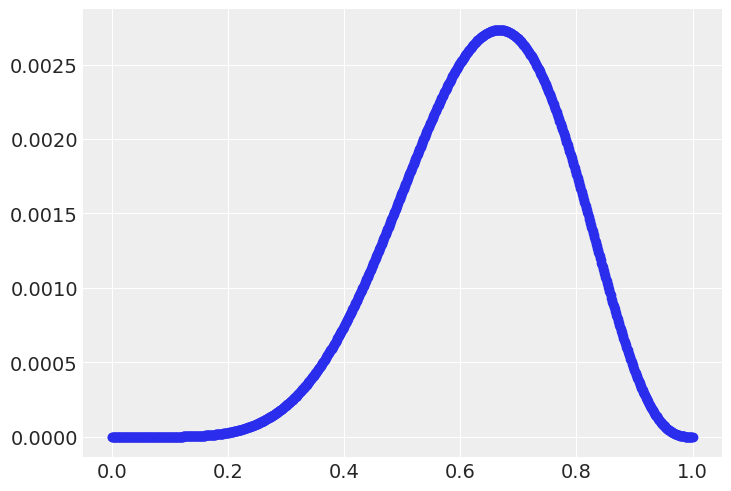

In [8]:
plt.scatter(p_grid, posterior)

In [38]:
# Categorical samples from 0,...,1 with probabilities of the posterior
samples = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

### Code 3.4

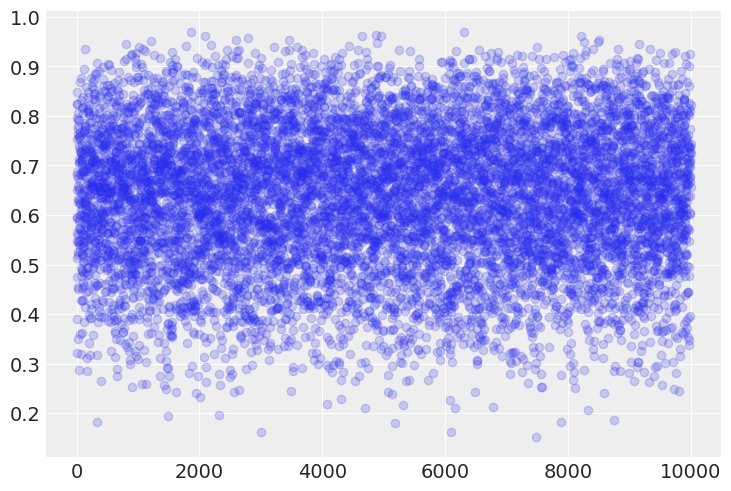

In [9]:
plt.scatter(range(len(samples)), samples, alpha=0.2)
plt.show()

### Code 3.5

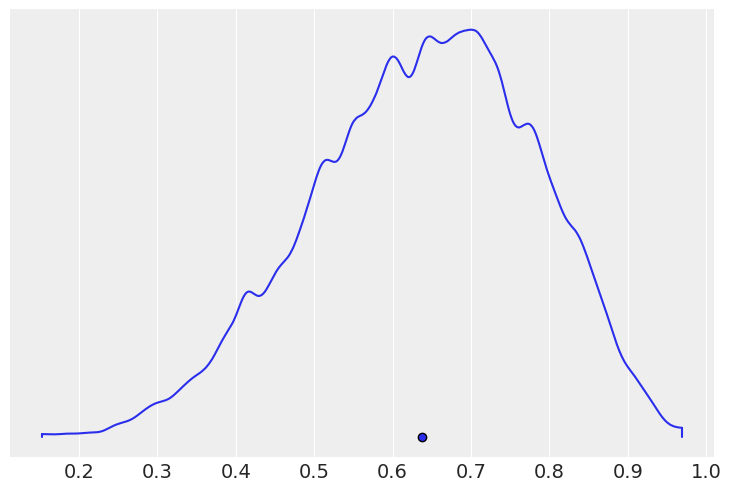

In [10]:
az.plot_density({"": samples}, hdi_prob=1)
plt.show()

### Code 3.6

In [11]:
# add up posterior probability where p < 0.5
jnp.sum(posterior[p_grid < 0.5])

DeviceArray(0.17187458, dtype=float32)

### Code 3.7

In [12]:
jnp.sum(samples < 0.5) / 1e4

DeviceArray(0.1711, dtype=float32)

### Code 3.8

In [13]:
jnp.sum((samples > 0.5) & (samples < 0.75)) / 1e4

DeviceArray(0.6025, dtype=float32)

### Code 3.9

In [14]:
jnp.quantile(samples, 0.8)

DeviceArray(0.7637638, dtype=float32)

### Code 3.10

In [15]:
jnp.quantile(samples, jnp.array([0.1, 0.9]))

DeviceArray([0.44644645, 0.8168168 ], dtype=float32)

### Code 3.11

In [16]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prior = jnp.repeat(1, 1000)
likelihood = jnp.exp(dist.Binomial(total_count=3, probs=p_grid).log_prob(3))
posterior = likelihood * prior
posterior = posterior / jnp.sum(posterior)
samples2 = p_grid[dist.Categorical(probs=posterior).sample(random.PRNGKey(0), (10000,))]

### Code 3.12

In [17]:
jnp.percentile(samples2, q=(25, 75))

DeviceArray([0.7077077, 0.9319319], dtype=float32)

### Code 3.13

In [18]:
numpyro.diagnostics.hpdi(samples2, prob=0.5)

array([0.8418418, 0.998999 ], dtype=float32)

### Code 3.14

In [19]:
p_grid[jnp.argmax(posterior)]

DeviceArray(1., dtype=float32)

### Code 3.15

In [20]:
samples2[jnp.argmax(gaussian_kde(samples2, bw_method=0.01)(samples))]

DeviceArray(0.988989, dtype=float32)

### Code 3.16

In [21]:
print(jnp.mean(samples2))
print(jnp.median(samples2))

0.8011086
0.8428428


### Code 3.17

In [22]:
jnp.sum(posterior * jnp.abs(0.5 - p_grid))

DeviceArray(0.31287515, dtype=float32)

### Code 3.18

In [23]:
loss = vmap(lambda d: jnp.sum(posterior * jnp.abs(d - p_grid)))(p_grid)

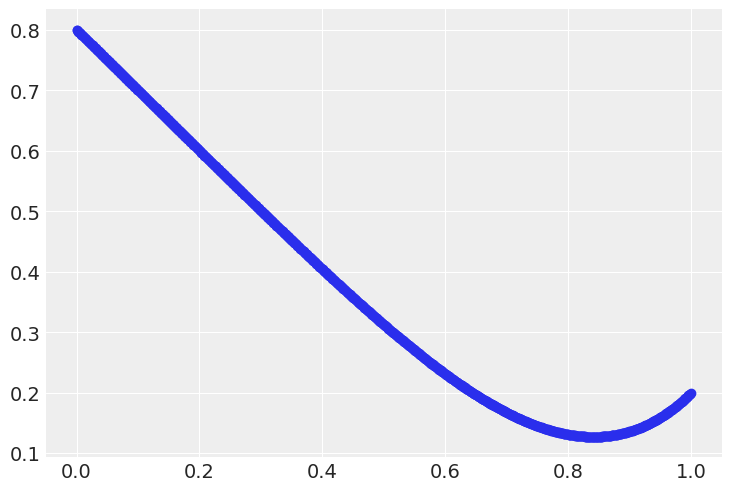

In [25]:
plt.scatter(p_grid, loss);

### Code 3.19

In [26]:
p_grid[jnp.argmin(loss)]

DeviceArray(0.8408408, dtype=float32)

### Code 3.20

In [27]:
jnp.exp(dist.Binomial(total_count=2, probs=0.7).log_prob(jnp.arange(3)))

DeviceArray([0.08999996, 0.42000008, 0.48999974], dtype=float32)

### Code 3.21

In [28]:
dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(0))

DeviceArray(1, dtype=int32)

### Code 3.22

In [29]:
dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(2), (10,))

DeviceArray([2, 1, 2, 1, 1, 2, 2, 2, 2, 1], dtype=int32)

### Code 3.23

In [30]:
dummy_w = dist.Binomial(total_count=2, probs=0.7).sample(random.PRNGKey(0), (100000,))
jnp.unique(dummy_w, return_counts=True)[1] / 1e5

DeviceArray([0.0888 , 0.41789, 0.49331], dtype=float32)

### Code 3.24

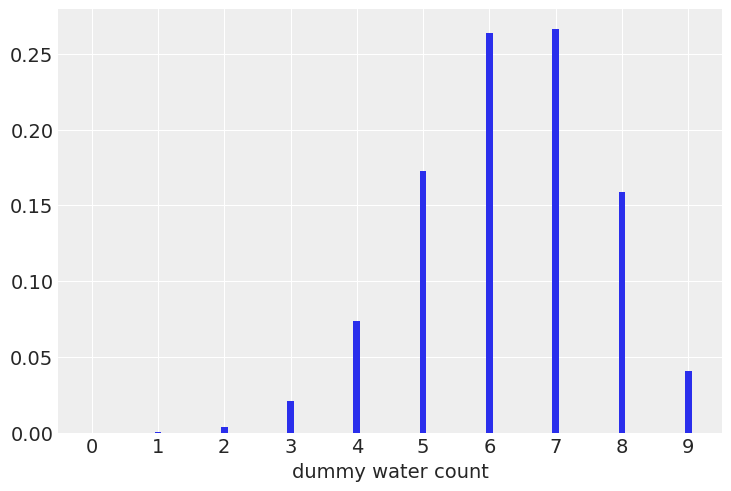

In [31]:
dummy_w = dist.Binomial(total_count=9, probs=0.7).sample(random.PRNGKey(0), (100000,))
ax = az.plot_dist(dummy_w.copy(), kind="hist", hist_kwargs={"rwidth": 0.1})
ax.set_xlabel("dummy water count", fontsize=14)
plt.show()

### Code 3.25

In [32]:
w = dist.Binomial(total_count=9, probs=0.6).sample(random.PRNGKey(0), (int(1e4),))

(array([2.000e+00, 4.200e+01, 2.040e+02, 7.700e+02, 1.700e+03, 2.445e+03,
        2.505e+03, 1.670e+03, 5.760e+02, 8.600e+01]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

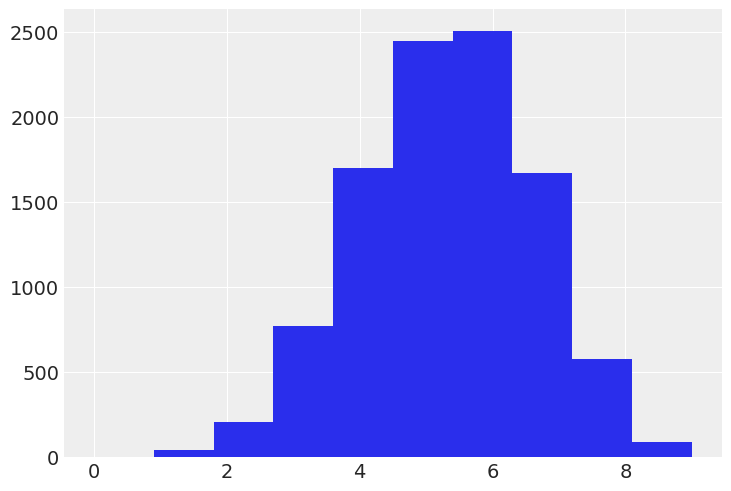

In [33]:
plt.hist(w)

### Code 3.26

(array([  15.,   47.,  136.,  275.,  489.,  748., 1180., 1623., 2346.,
        3141.]),
 array([0.11011011, 0.1990991 , 0.28808808, 0.37707707, 0.46606606,
        0.5550551 , 0.64404404, 0.73303306, 0.822022  , 0.91101104,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

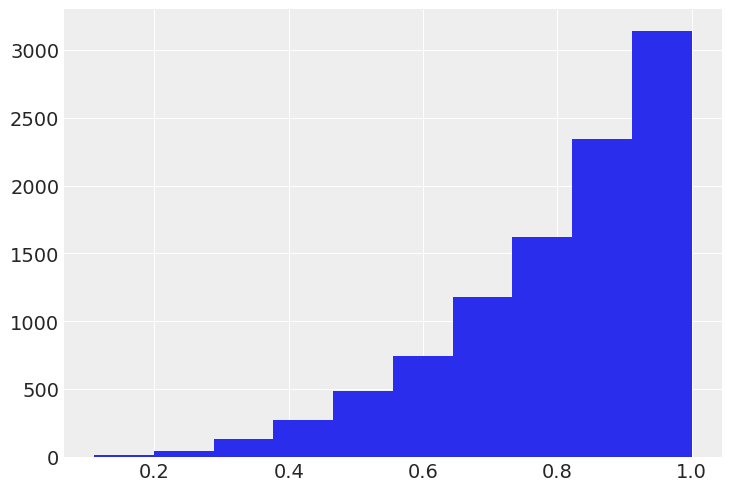

In [39]:
plt.hist(samples)

In [40]:
w = dist.Binomial(total_count=9, probs=samples).sample(random.PRNGKey(0))

(array([  10.,   54.,  145.,  302.,  503.,  774., 1139., 1655., 2274.,
        3144.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

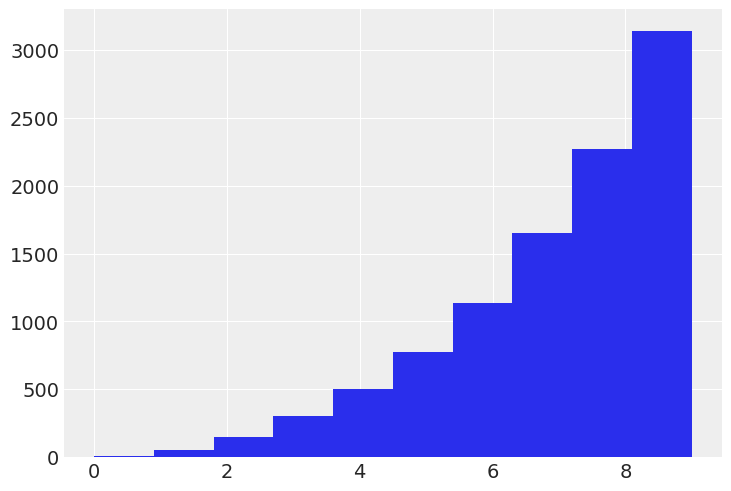

In [41]:
plt.hist(w)

# Practice 

### Code 3.27

In [42]:
p_grid = jnp.linspace(start=0, stop=1, num=1000)
prior = jnp.repeat(1, 1000)
likelihood = jnp.exp(dist.Binomial(total_count=9, probs=p_grid).log_prob(6))
posterior = likelihood * prior
posterior = posterior / jnp.sum(posterior)
samples = p_grid[dist.Categorical(posterior).sample(random.PRNGKey(100), (10000,))]

In [45]:
#3E1
sum(samples < 0.2) / len(samples)

0.001

### Code 3.28

In [46]:
# fmt: off
birth1 = [
    1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
    0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
    0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
]
birth2 = [
    0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
    0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
    0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
]

### Code 3.29

In [47]:
homeworkch3 = pd.read_csv("../data/homeworkch3.csv")

### Code 3.30

In [48]:
sum(birth1) + sum(birth2)

111